<span style="font-size:35px; color:red">Zomato Bengaluru</span>


<img src="/config/workspace/dataset/D52C710B-234C-4C19-82D6-EE3DC656F25E-1140x530.jpeg" width="800" height="400">


In [ ]:
# importing the required libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.graph_objs as go 
import plotly.express as px 
import os

In [3]:
# importing the dataset
df = pd.read_csv("/config/workspace/dataset/zomato.csv")

In [4]:
# checking the shape of the data
df.shape

(51717, 17)

In [5]:
df.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [6]:
# checking whether the dataset has any null values
df.isnull().sum().sort_values(ascending=False)

dish_liked                     28078
rate                            7775
phone                           1208
approx_cost(for two people)      346
rest_type                        227
cuisines                          45
location                          21
listed_in(type)                    0
menu_item                          0
reviews_list                       0
url                                0
address                            0
votes                              0
book_table                         0
online_order                       0
name                               0
listed_in(city)                    0
dtype: int64

In [7]:
# checking more info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

<span style="font-size:25px; color: #7fff00">Data Cleaning</span>

In [8]:
for i in range(len(df.columns)):
    print(f"The unique percentage {df.columns[i]} :",format((df[df.columns[i]].nunique()/df.shape[0])*100,'.2f'))

The unique percentage url : 100.00
The unique percentage address : 22.23
The unique percentage name : 17.00
The unique percentage online_order : 0.00
The unique percentage book_table : 0.00
The unique percentage rate : 0.12
The unique percentage votes : 4.50
The unique percentage phone : 28.86
The unique percentage location : 0.18
The unique percentage rest_type : 0.18
The unique percentage dish_liked : 10.19
The unique percentage cuisines : 5.27
The unique percentage approx_cost(for two people) : 0.14
The unique percentage reviews_list : 43.53
The unique percentage menu_item : 17.59
The unique percentage listed_in(type) : 0.01
The unique percentage listed_in(city) : 0.06


In [9]:
# dropping dublicate values
df.duplicated().sum()
# there are no dublicate row with reference to entire dataset

0

In [10]:
df[['name','address','location']][df.duplicated(subset=['name','address','location'])]

,name,address,location
14,San Churro Cafe,"1112, Next to KIMS Medical College, 17th Cross...",Banashankari
44,Onesta,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Banashankari
104,CAFE NOVA,"101, Water Tank Road, 2nd Block, 3rd Stage, Ba...",Banashankari
193,CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...,"12,29 Near PES University Back Gate, D'Souza N...",Banashankari
199,The Vintage Cafe,"146, 50 ft Road, 3rd Phase, 3rd Stage, Near Ka...",Banashankari
...,...,...,...
51711,Bhagini,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Whitefield
51712,Best Brews - Four Points by Sheraton Bengaluru...,"Four Points by Sheraton Bengaluru, 43/3, White...",Whitefield
51713,Vinod Bar And Restaurant,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,"ITPL Main Road, Whitefield"


In [11]:
# dropping the duplicate values
df = df.drop_duplicates(subset=['name','address','location'], keep='last')

In [12]:
df.shape

(12530, 17)

In [13]:
df['rate'] = df['rate'].replace(r'[^\S]|/5', '', regex=True).replace(r'-|NEW|nan',np.nan, regex=True)

In [14]:
# Changing the rate column from object to float
df['rate'] = pd.to_numeric(df['rate'])

In [15]:
# replacing any non word characters from the string
df['approx_cost(for two people)'].replace(r'[^\w]', '' , regex=True,inplace=True)
df['approx_cost(for two people)']= pd.to_numeric(df['approx_cost(for two people)'])

In [16]:
df['approx_cost(for two people)'].unique()

array([ 900.,  550.,  850.,  500.,  700.,  250.,  400.,  300.,  150.,
        100.,  200.,  650.,  350.,  600.,  800.,  450., 1000.,  750.,
         80.,   50., 1600.,  950., 1100., 1200., 1300., 1800., 2000.,
         nan,  469.,   70., 3000.,  180.,   60., 1500., 2200., 1400.,
       2500.,  560., 1700.,  190., 1350., 1050.,  120., 1250.,   40.,
        230.,  130., 2100., 2300., 3200., 4000., 3400., 2400., 4100.,
       5000., 3700., 2700., 4500.,  240.,  360., 3500., 6000., 1900.,
        140., 2600., 1650.,  199., 2800.,  330., 1450.])

In [17]:
# split phone created 'phone1','phone2'
phone_col = ['phone1','phone2']

y = 0
for i in phone_col:
    df[i] = df['phone'].str.split('\n').str[y]
    df[i] = df[i].str.replace(r'[^\d]',"",regex=True)
    y+=1

In [18]:
# drop duplicate columns
df.drop(['url','phone','listed_in(city)'],axis=1, inplace=True)

<span style="font-size:25px; color: #7fff00">Count Plot Graphics Top 10 </span>

In [19]:
#Count Plot Graphic
def count_plot(data, x, y):
    plt.figure(figsize=(x,y))
    ax = sns.countplot(x=data, palette='Spectral', edgecolor="white", linewidth=1, order=data.value_counts().iloc[0:10].index)
    plt.xticks(rotation=90)
    for c in ax.containers:
        ax.bar_label(c, fmt='%.0f',label_type='edge')
    None

In [20]:
df['location'].value_counts().iloc[0:10]

Whitefield           887
Electronic City      730
BTM                  729
HSR                  706
Marathahalli         688
Indiranagar          533
JP Nagar             523
Bannerghatta Road    474
Jayanagar            367
Bellandur            363
Name: location, dtype: int64

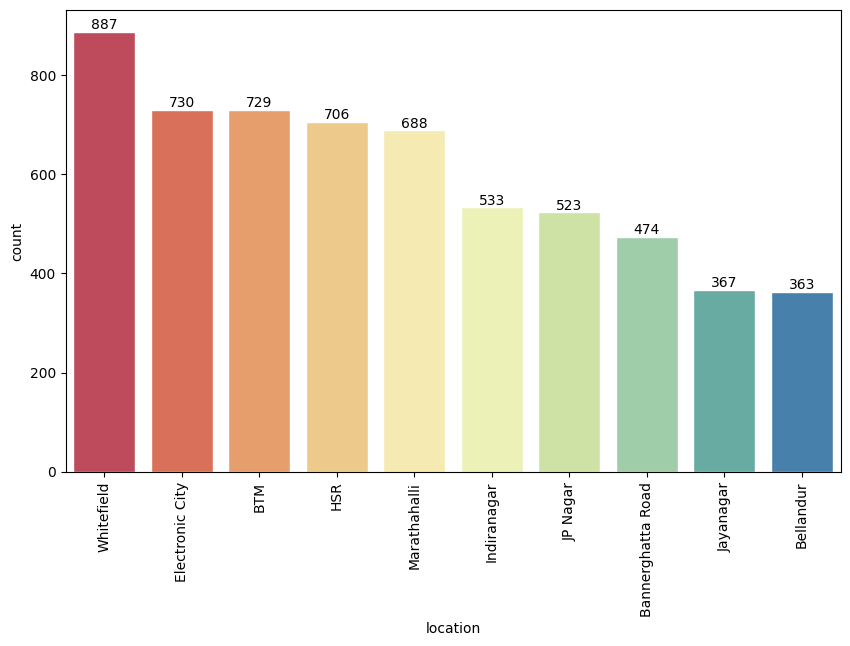

In [21]:
count_plot(df['location'],10,6)

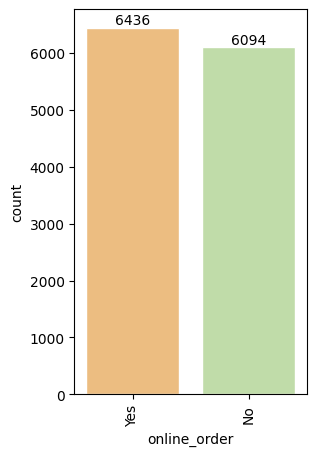

In [22]:
count_plot(df['online_order'], 3, 5)

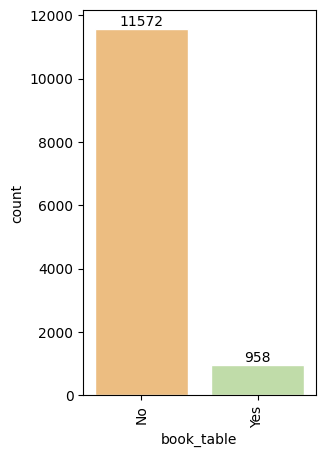

In [23]:
count_plot(df['book_table'], 3, 5)

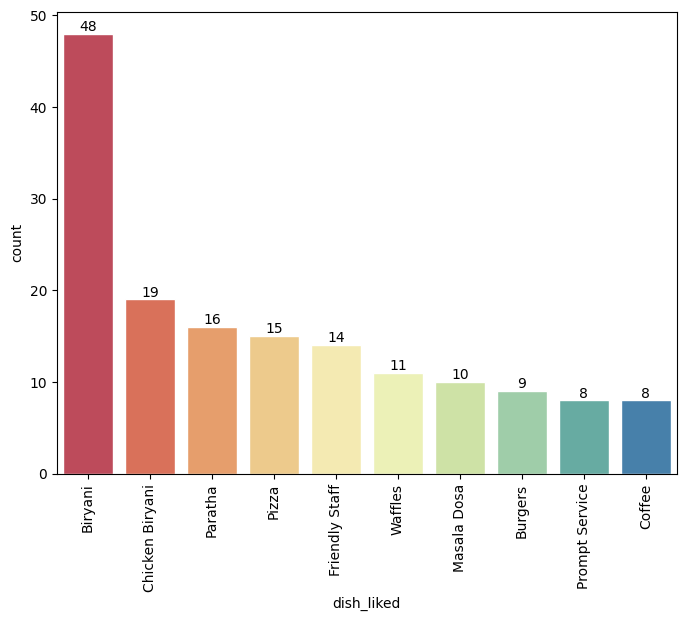

In [24]:
count_plot(df['dish_liked'], 8, 6)

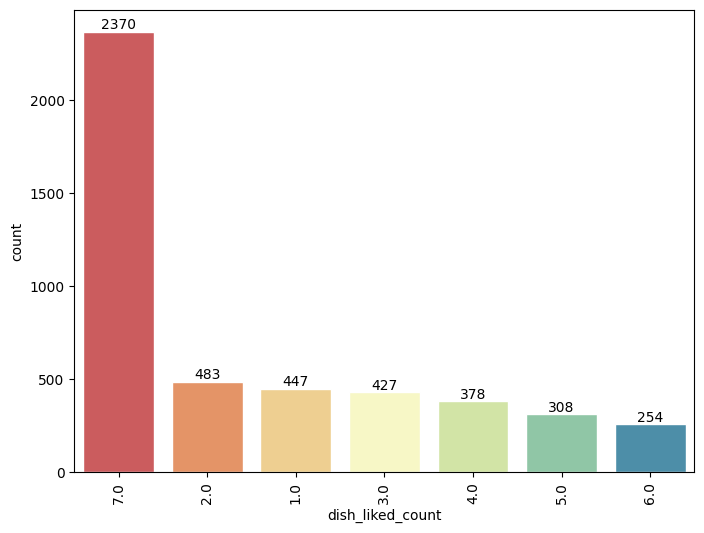

In [25]:
df['dish_liked_count'] = df['dish_liked'].str.count(',') + 1 #number of dish liked in single row by counting the number of ',' in dish_liked
df['dish_liked_count'].describe()
count_plot(df['dish_liked_count'], 8, 6)

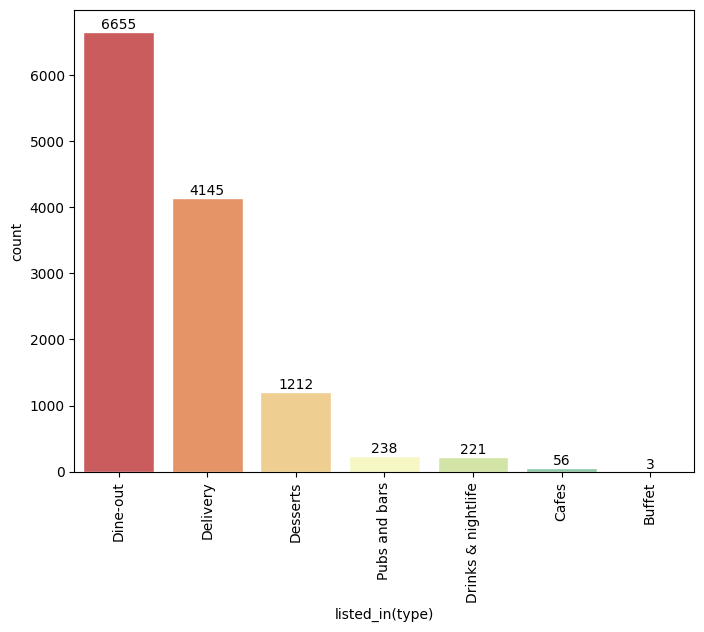

In [26]:
count_plot(df['listed_in(type)'], 8, 6)

In [27]:
df['dish_liked'].loc[48]


'Momos, Dragon Chicken, Hakka Noodles, Chowmein, Chop Suey, Chilli Garlic Noodles, Garlic Rice'

In [28]:
df['dish_liked'].loc[48].count(',')

6

<span style="font-size:25px; color: #7fff00">The relationship between Restaurant type and Approximate cost</span>

In [29]:
# filter rest_type, approx_cost(for two people), rate
res_df = df[['rest_type','approx_cost(for two people)','rate']]
res_df = res_df.dropna(how='any',axis=0) # dropping null values from df


In [30]:
pd.options.display.max_rows = 500

In [31]:
pd.set_option('display.max_rows', 500)

In [32]:

res_df['rest_type'].iloc[10:30]

170    Takeaway, Delivery
171           Quick Bites
190           Quick Bites
229           Quick Bites
245           Quick Bites
254                  Cafe
269        Dessert Parlor
272           Quick Bites
281         Casual Dining
282              Delivery
286         Casual Dining
293                  Cafe
309         Casual Dining
314              Delivery
319           Quick Bites
380           Quick Bites
382           Quick Bites
402         Casual Dining
412         Casual Dining
466           Quick Bites
Name: rest_type, dtype: object

In [33]:
res_df['rest_type']= res_df['rest_type'].str.split(',')

In [34]:
res_df

,rest_type,approx_cost(for two people),rate
22,[Cafe],900.0,3.6
28,[Cafe],550.0,3.3
48,[Casual Dining],850.0,3.7
70,"[Takeaway, Delivery]",500.0,3.6
73,[Delivery],700.0,2.9
...,...,...,...
51709,"[Casual Dining, Bar]",800.0,3.7
51711,"[Casual Dining, Bar]",800.0,2.5
51712,[Bar],1500.0,3.6
51715,[Bar],2500.0,4.3


In [35]:
res_df = res_df.explode('rest_type')

In [41]:
# Get the Mean Group by rest_type
res_df = res_df.groupby('rest_type').mean()['approx_cost(for two people)'].sort_values(ascending=True)

In [44]:
res_df = pd.DataFrame({'rest_type':res_df.index, 'approx_cost(for two people)':res_df.values})

In [47]:
res_df = df[["rest_type", "approx_cost(for two people)", 'rate']]
res_df = res_df.dropna(how="any", axis=0)
res_df["rest_type"] = res_df["rest_type"].str.split(", ")
res_df = res_df.explode("rest_type")

# Get the Mean group by rest_type
res_df = res_df.groupby("rest_type").mean()["approx_cost(for two people)"].sort_values(ascending=True)
res_df = pd.DataFrame({"rest_type": res_df.index,  "approx_cost(for two people)": res_df.values})

# Show the chart
fig = px.bar(res_df,
             width =1000, height=800, 
             x     ="approx_cost(for two people)", y="rest_type", 
             title ="Rest. Type vs. Approximate Cost", text="approx_cost(for two people)", text_auto='.2s',
             color ="approx_cost(for two people)",  color_continuous_scale='viridis')

fig.show()

## Restraunt Type Count

In [59]:
gd_df_x = df['rest_type'].str.get_dummies(sep=",")
gd_df_x = pd.DataFrame(gd_df_x.sum(), columns=['count'])
gd_df_x = gd_df_x.reset_index()
gd_df_x.sort_values(by='count', ascending=False, inplace=True)

In [63]:
fig = px.bar(gd_df_x, width=1200, height=500, x='index', y='count', 
            title="Restaurant Type Count", text='count', color="count", color_continuous_scale='Bluyl')
fig.show()

## Rate Approx Cost

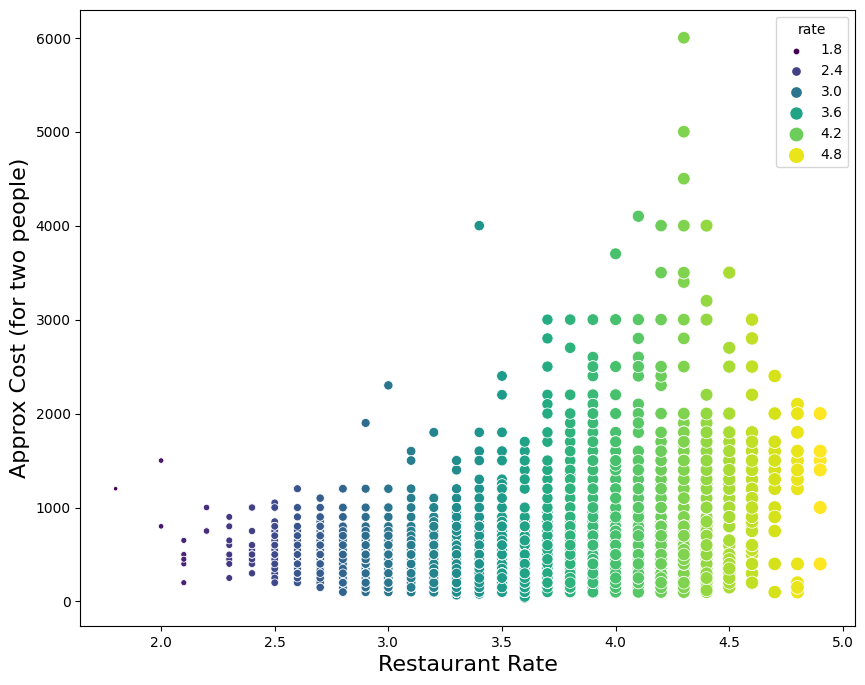

In [64]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='rate', y='approx_cost(for two people)', hue='rate', size='rate', palette='viridis', sizes=(10,100))
plt.ylabel("Approx Cost (for two people)", size=16)
plt.xlabel("Restaurant Rate", size=16)
None

# Rate Approx Cost

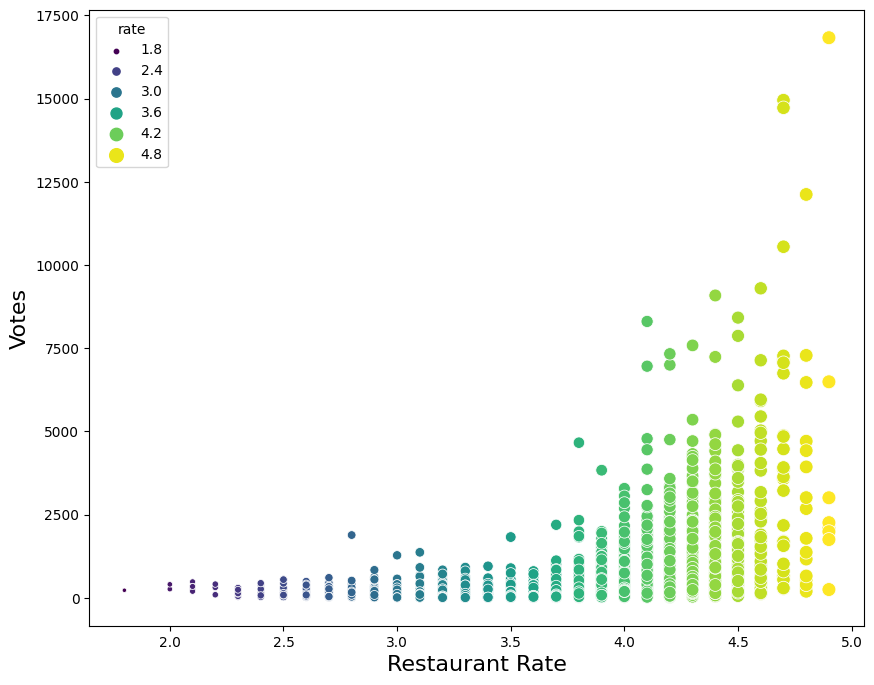

In [66]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='rate', y='votes', hue='rate', size='rate', palette='viridis', sizes=(10,100))
plt.ylabel("Votes", size=16)
plt.xlabel("Restaurant Rate", size=16)
None

## Top 100 Menu Word

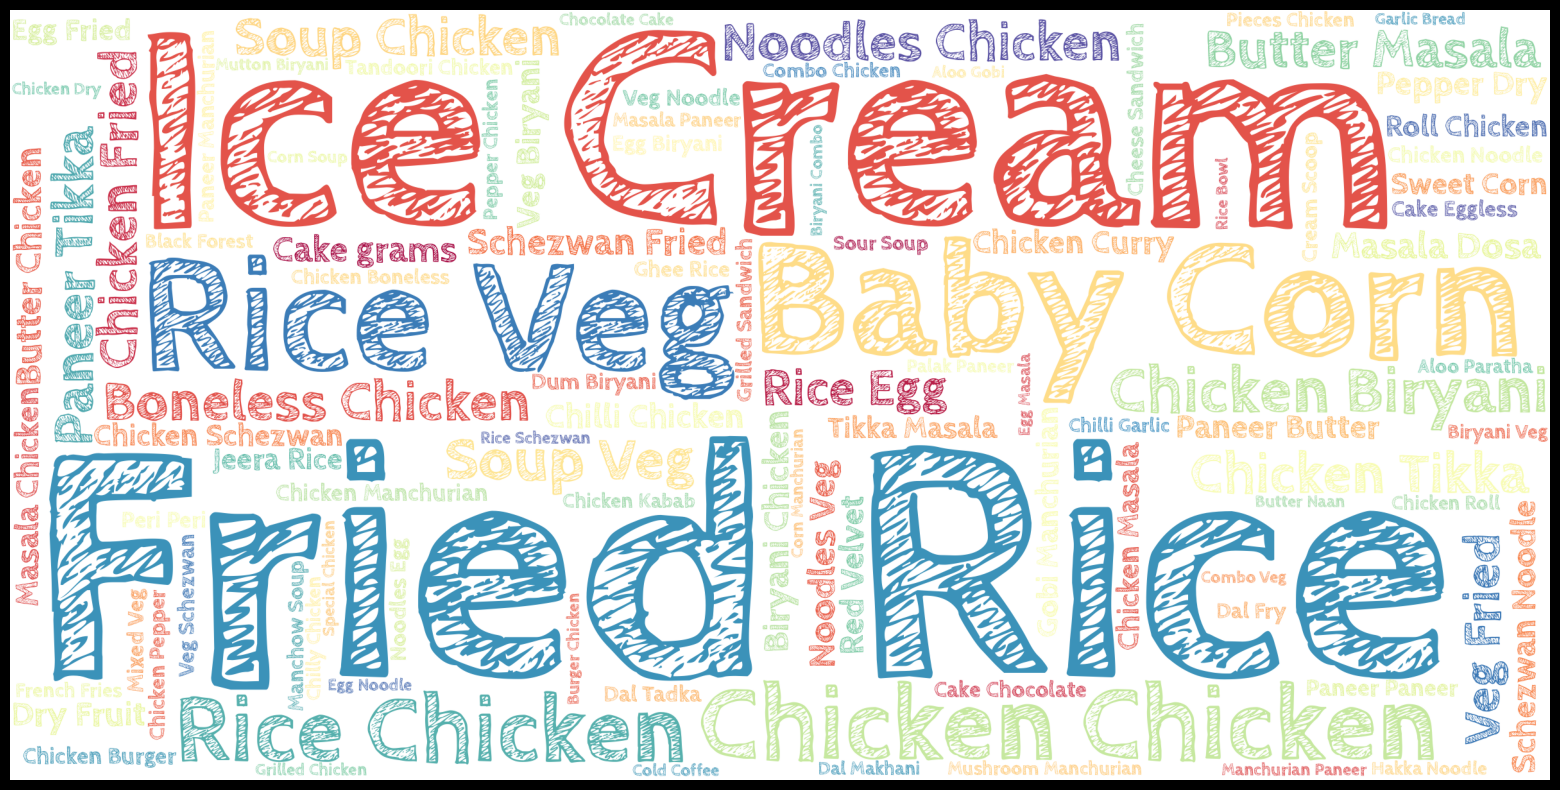

In [73]:
from wordcloud import WordCloud

word_df = df['menu_item']
word_df = word_df.dropna(how='any', axis=0)

word_df = word_df.str.replace(r'[^\w\s]','', regex=True).str.replace('Non|kg', '', regex=True)
text=''.join(word_df)

wordcloud= WordCloud(font_path='/config/workspace/dataset/CabinSketch-Bold.ttf',
                        width=2400, height=1200,
                        background_color="white", max_words=100, colormap="Spectral").generate(text)

# Generate plot
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Top 100 dish liked

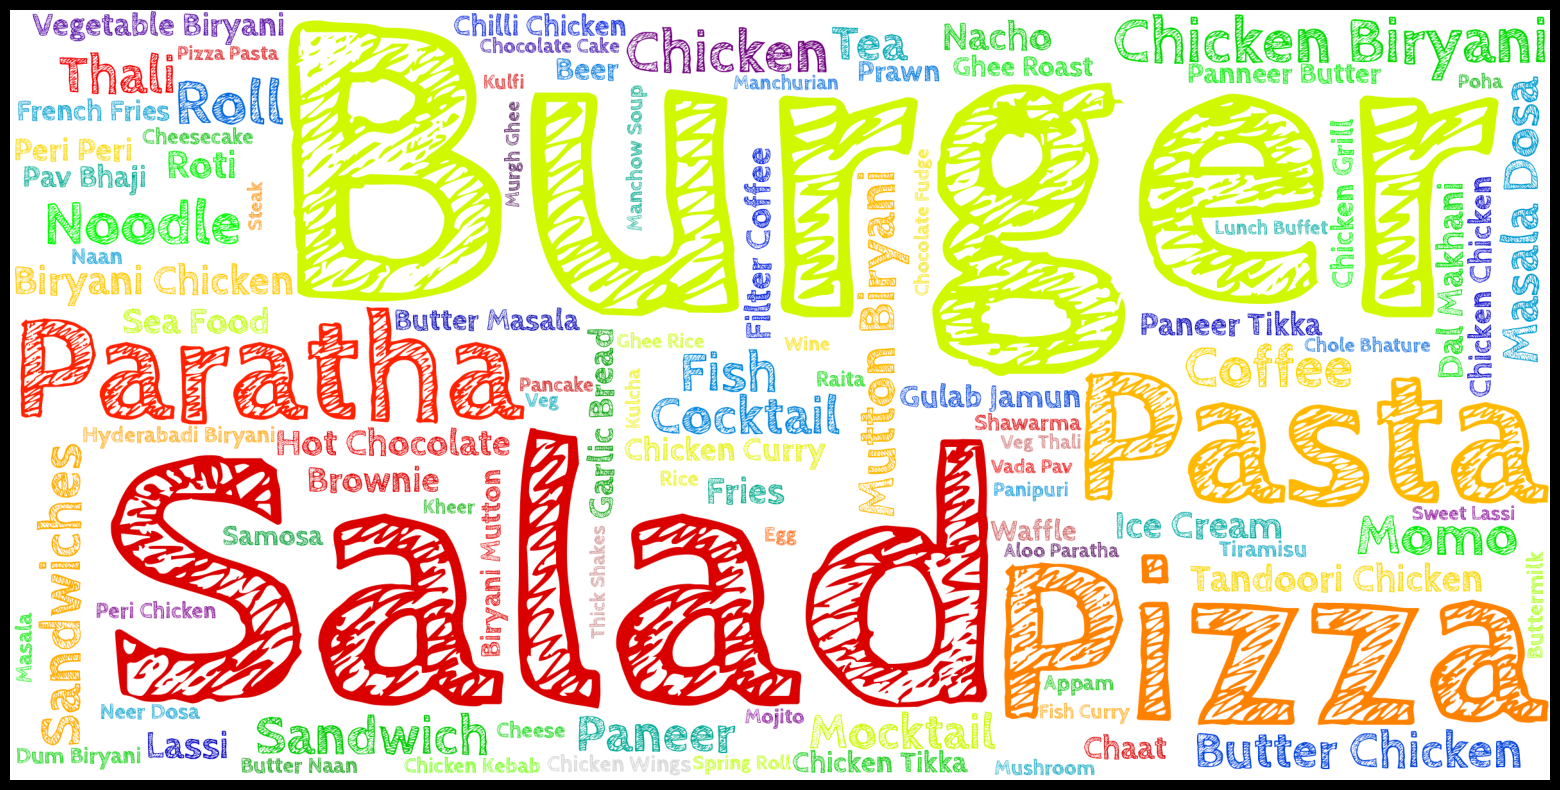

In [75]:
word_df1 = df['dish_liked']
word_df1 = word_df1.dropna(how="any", axis=0)
text1 =' '.join(word_df1)
wordcloud1= WordCloud(font_path='/config/workspace/dataset/CabinSketch-Bold.ttf',
                        width=2400, height=1200,
                        background_color="white", max_words=100 , colormap="nipy_spectral_r").generate(text1)
# Generate plot
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud1)
plt.axis("off")
plt.show()

In [ ]:
res_df.shape

(9378, 3)

## Most Popular Top 10 Restorant

In [77]:
df0 = df[['name','votes','rate','location','address']].sort_values(by='votes', ascending=False)

In [79]:
df0.set_index('name').iloc[:10]

,votes,rate,location,address
name,,,,
Byg Brewski Brewing Company,16832,4.9,Sarjapur Road,"Behind MK Retail, Sarjapur Road, Bangalore"
Toit,14956,4.7,Indiranagar,"298, Namma Metro Pillar 62, 100 Feet Road, Ind..."
Truffles,14726,4.7,Koramangala 5th Block,"28, 4th 'B' Cross, Koramangala 5th Block, Bang..."
AB's - Absolute Barbecues,12121,4.8,Marathahalli,"90/4, 3rd Floor, Outer Ring Road, Munnekollaly..."
The Black Pearl,10550,4.7,Koramangala 5th Block,"105, 1st A Cross Road, Jyothi Nivas College Ro..."
Big Pitcher,9300,4.6,Old Airport Road,"LR Arcade,4121, Old Airport Road, Bangalore"
Onesta,9085,4.4,Koramangala 4th Block,"562, 8th Main, Koramangala 4th Block, Bangalore"
Arbor Brewing Company,8419,4.5,Brigade Road,"8, 3rd Floor, Allied Grande Plaza, Diagonally ..."
Empire Restaurant,8304,4.1,Indiranagar,"Next to BSNL, HAL 2nd Stage, 80 Feet Road, Ind..."


## Location & Cost TreeMap

In [80]:
df_loc_cost = df.groupby("location",as_index=False)["approx_cost(for two people)"].mean().round(0)
#df_loc_cost.sort_values(by='approx_cost(for two people)', ascending=False)
fig = px.treemap(df_loc_cost, path = [px.Constant("all"), "location","approx_cost(for two people)"], 
                 values   ='approx_cost(for two people)',
                 color    = 'approx_cost(for two people)',
                 color_continuous_scale = 'pinkyl',)

fig.update_layout(margin  = dict(t=50, l=30, r=30, b=30))
fig.show()